In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from scipy.optimize import fsolve
from pylab import *


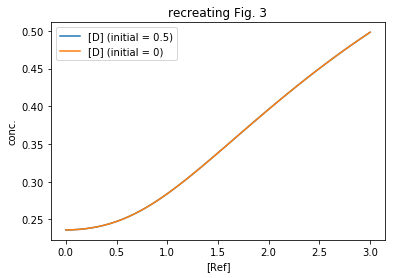

In [4]:
##recreating Fig. 3 from Fiore et al. (2016) paper where systems steady state characteristics are observed 
##and a graph of concentration of D ([D]) vs concentration of Reference ([Ref]) is plotted
##using normal odeint, no partial differential equations. Therefore, no Q1,e or Q2,e

##variables
X0 = 0.1
Xx = 2
Yx = 1.4
nx = 2
Kr = 1
Kq = 0.1
Kb = 0.5
Kc = 0.015
Kd = 0.5
KQ = 0.05
diff_cell = 2
gamma_i = 0.4
gamma_e = 0.2
diff_ex = 13.3


##equations
def eq1 (Y, t, Ref):
    A_Q2 = Y[0]
    B = Y[1]
    C = Y[2]
    D = Y[3]
    Q1c = Y[4]
    Q1t = Y[5]
    Q2c = Y[6]
    Q2t = Y[7]
    dydt =np.empty(len(Y))
    
    ##A_Q2
    dydt[0] = (X0 + (Xx * ( (Kr ** nx) / ((Kr ** nx) + (Ref ** nx)) ))) * (X0 + (Xx * ( (Q2c ** nx) / ((Kq ** nx) + (Q2c ** nx)) ))) - (Yx * A_Q2)  
    ##B
    dydt[1] = X0 + (Xx * ((A_Q2 ** nx)/((Kb ** nx) +(A_Q2 ** nx)))) - (Yx * B)
    ##C
    dydt[2] = X0 + (Xx * ((Q1t ** nx)/((Kc ** nx) +(Q1t ** nx)))) - (Yx * C)
    ##D
    dydt[3] = X0 + (Xx * ((Kd ** nx) / ((Kd ** nx) + (C ** nx)))) - (Yx * D)
    ##Q1c
    dydt[4] = KQ * B + (diff_cell * (Q1c - Q1c)) - (gamma_i*Q1c)
    ##Q1t
    dydt[5] = (diff_cell * (Q1c - Q1t)) - (gamma_i*Q1t)
    ##Q2c
    dydt[6] = (diff_cell * (Q2t - Q2c)) - (gamma_i*Q2c)
    ##Q2t
    dydt[7] = (KQ*D) +(diff_cell * (Q2t - Q2t)) - (gamma_i*Q2t)
    return dydt

##In the paper the concentrations of Ref tested were from 0.0 to 3.0 in 50 steps 
ref_fig3 = np.linspace(0,3,50)


##The initial concentrations are never discussed so to check how/if the behaviour changes initial concentrations
##were set to either 0.0 or 0.5
Y_initial= np.array([0,0,0,0,0,0,0,0])
Y_initial_nonZero= np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

##Time was set to 400 as in this time the concentration of D reaches steady state
t = np.linspace(0,400,50)

##empty lists
D_list = []
D_list2= []

for r in ref_fig3:
    Ref = r
    eq_fig3 = odeint(eq1, Y_initial_nonZero, t, args=(Ref,), mxstep=5000000)
    eq_fig3_10 = odeint(eq1, Y_initial, t, args=(Ref,), mxstep=5000000)
    D_list.append(eq_fig3[-1,3])
    D_list2.append(eq_fig3_10[-1,3])
    
##print(D_list)


##creating the figure
plt.figure()
plt.plot(ref_fig3, D_list, label = '[D] (initial = 0.5)')
plt.plot(ref_fig3, D_list2, label = '[D] (initial = 0)')
plt.legend(loc='best')
plt.xlabel('[Ref]')
plt.ylabel('conc.')
plt.title('recreating Fig. 3')
plt.show()

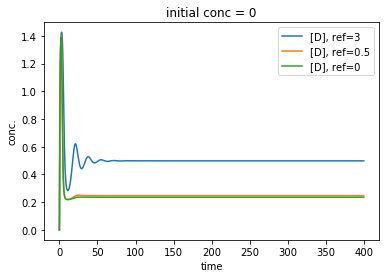

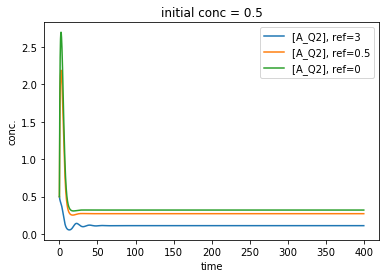

In [7]:
##recreating Fig. 5 from Fiore et al. (2016) paper where the concentration of D ([D]) vs time is plotted at a set [Ref]
##using normal odeint, no partial differential equations. Therefore, no Q1,e or Q2,e

##variables
X0 = 0.1
Xx = 2
Yx = 1.4
nx = 2
Kr = 1
Kq = 0.1
Kb = 0.5
Kc = 0.015
Kd = 0.5
KQ = 0.05
diff_cell = 2
gamma_i = 0.4
gamma_e = 0.2
diff_ex = 13.3
##800 micrometer^2/sec



def eq1 (Y, t, Ref):
    A_Q2 = Y[0]
    B = Y[1]
    C = Y[2]
    D = Y[3]
    Q1c = Y[4]
    Q1t = Y[5]
    Q2c = Y[6]
    Q2t = Y[7]
    dydt =np.empty(len(Y))
    
    ##A_Q2
    dydt[0] = (X0 + (Xx * ( (Kr ** nx) / ((Kr ** nx) + (Ref ** nx)) ))) * (X0 + (Xx * ( (Q2c ** nx) / ((Kq ** nx) + (Q2c ** nx)) ))) - (Yx * A_Q2)  
    ##B
    dydt[1] = X0 + (Xx * ((A_Q2 ** nx)/((Kb ** nx) +(A_Q2 ** nx)))) - (Yx * B)
    ##C
    dydt[2] = X0 + (Xx * ((Q1t ** nx)/((Kc ** nx) +(Q1t ** nx)))) - (Yx * C)
    ##D
    dydt[3] = X0 + (Xx * ((Kd ** nx) / ((Kd ** nx) + (C ** nx)))) - (Yx * D)
    ##Q1c
    dydt[4] = KQ * B - (gamma_i*Q1c)
    ##Q1t
    dydt[5] = (diff_cell * (Q1c - Q1t)) - (gamma_i*Q1t)
    ##Q2c
    dydt[6] = (diff_cell * (Q2t - Q2c)) - (gamma_i*Q2c)
    ##Q2t
    dydt[7] = (KQ*D) - (gamma_i*Q2t)
    return dydt

##The initial concentrations are never discussed so to check how/if the behaviour changes initial concentrations
##were set to either 0.0 or 0.5
Y_initial= np.array([0,0,0,0,0,0,0,0])
Y_initial_nonZero= np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])

##Time was set to 400 as in this time the concentration of D reaches steady state
t = np.linspace(0,400,100000)

##set concentrations of Ref to be tested
r100 = 3 
r05 = 0.5
r0 = 0

##calculations:
eqr100 = odeint(eq1, Y_initial_nonZero, t, args=(r100,), mxstep=5000000)
eqr05 = odeint(eq1, Y_initial_nonZero, t, args=(r05,), mxstep=5000000)
eqr0 = odeint(eq1, Y_initial_nonZero, t, args=(r0,), mxstep=5000000)

e0qr100 = odeint(eq1, Y_initial, t, args=(r100,), mxstep=5000000)
e0qr05 = odeint(eq1, Y_initial, t, args=(r05,), mxstep=5000000)
e0qr0 = odeint(eq1, Y_initial, t, args=(r0,), mxstep=5000000)
##print(e0qr0)

##plotting the [D] vs time at set [Ref]
plt.figure()
plt.plot(t, e0qr100[:,3], label = '[D], ref=3')
plt.plot(t, e0qr05[:,3], label = '[D], ref=0.5')
plt.plot(t, e0qr0[:,3], label = '[D], ref=0')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('conc.')
plt.title('initial conc = 0')
plt.show()

##Can plot also the concentrations of other species to see how they behave
plt.figure()
##plt.plot(t, eqr100[:,2], label = '[C], ref=100')
plt.plot(t, eqr100[:,0], label = '[A_Q2], ref=3')
##plt.plot(t, eqr05[:,2], label = '[C], ref=0.5')
plt.plot(t, eqr05[:,0], label = '[A_Q2], ref=0.5')
##plt.plot(t, eqr0[:,2], label = '[C], ref=0')
plt.plot(t, eqr0[:,0], label = '[A_Q2], ref=0')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('conc.')
plt.title('initial conc = 0.5')
plt.show()

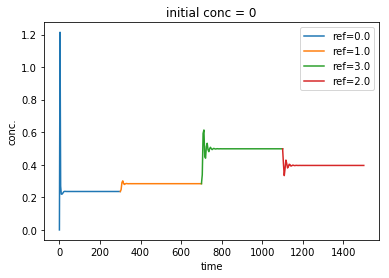

In [8]:
##recreating Fig. 4A from Fiore et al. (2016) paper where the multi-setp point regulation is observed 
##and a graph of concentration of D ([D]) vs time is plotted
##using normal odeint, no partial differential equations. Therefore, no Q1,e or Q2,e
##Initial concentrations are = 0.0

##[Ref] changes at time points = 300, 700, 1100
t1 = np.linspace(0,300,100)
t2 = np.linspace(300,700,100)
t3 = np.linspace(700,1100,100)
t4 = np.linspace(1100,1500,100)

## 0 < t < 300 when [Ref]=0.0
eq1_noQe = odeint(eq1, Y_initial, t1, args=(0.0,), mxstep=5000000)
results1 = eq1_noQe[-1:,]
b_results1 = results1.ravel()
#print(results1)
#print(b_results1)

## 300 < t < 700 when [Ref]=1.0
eq2_noQe = odeint(eq1, b_results1, t2, args=(1.0,), mxstep=5000000)
results2 = eq2_noQe[-1:,]
b_results2 = results2.ravel()
##print(results2)
##print(b_results2)

## 700 < t < 1100 when [Ref]=3.0
eq3_noQe = odeint(eq1, b_results2, t3, args=(3,), mxstep=5000000)
results3 = eq3_noQe[-1:,]
b_results3 = results3.ravel()
##print(results3)
##print(b_results3)

## 1100 < t < 1500 when [Ref]=2.0
eq4_noQe = odeint(eq1, b_results3, t4, args=(2,), mxstep=5000000)
results4 = eq4_noQe[-1:,]
b_results4 = results4.ravel()
##print(results4)
##print(b_results4)


plt.figure()
plt.plot(t1, eq1_noQe[:,3], label = 'ref=0.0')
plt.plot(t2, eq2_noQe[:,3], label = 'ref=1.0')
plt.plot(t3, eq3_noQe[:,3], label = 'ref=3.0')
plt.plot(t4, eq4_noQe[:,3], label = 'ref=2.0')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('conc.')
plt.title('initial conc = 0')
plt.show()


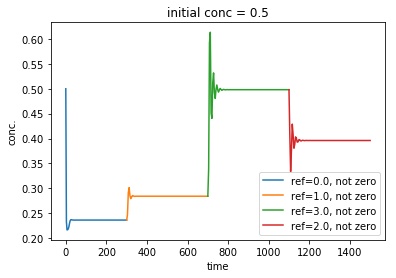

In [9]:
##Same as above but initial concentrations are = 0.5
##recreating Fig. 4A from Fiore et al. (2016) paper where the multi-setp point regulation is observed 
##and a graph of concentration of D ([D]) vs time is plotted
##using normal odeint, no partial differential equations. Therefore, no Q1,e or Q2,e


t1 = np.linspace(0,300,100)
t2 = np.linspace(300,700, 100)
t3 = np.linspace(700,1100, 100)
t4 = np.linspace(1100,1500, 100)

eq10_noQe = odeint(eq1, Y_initial_nonZero, t1, args=(0.0,), mxstep=5000000)
results10 = eq10_noQe[-1:,]
b_results10 = results10.ravel()
#print(results10)
#print(b_results10)


eq20_noQe = odeint(eq1, b_results10, t2, args=(1.0,), mxstep=5000000)
results20 = eq20_noQe[-1:,]
b_results20 = results20.ravel()
##print(results20)
##print(b_results20)

eq30_noQe = odeint(eq1, b_results20, t3, args=(3.0,), mxstep=5000000)
results30 = eq30_noQe[-1:,]
b_results30 = results30.ravel()
##print(results30)
##print(b_results30)

eq40_noQe = odeint(eq1, b_results30, t4, args=(2.0,), mxstep=5000000)
results40 = eq4_noQe[-1:,]
b_results40 = results40.ravel()
##print(results40)
##print(b_results40)


plt.figure()


plt.plot(t1, eq10_noQe[:,3], label = 'ref=0.0, not zero')
plt.plot(t2, eq20_noQe[:,3], label = 'ref=1.0, not zero')
plt.plot(t3, eq30_noQe[:,3], label = 'ref=3.0, not zero')
plt.plot(t4, eq40_noQe[:,3], label = 'ref=2.0, not zero')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('conc.')
plt.title('initial conc = 0.5')




plt.show()

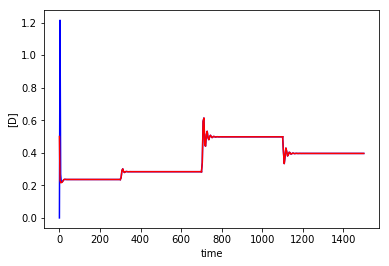

In [13]:
plt.figure()



plt.plot(t1, eq1_noQe[:,3], 'b', label = 'ref=0.0')
plt.plot(t2, eq2_noQe[:,3], 'b', label = 'ref=1.0')
plt.plot(t3, eq3_noQe[:,3], 'b', label = 'ref=3.0')
plt.plot(t4, eq4_noQe[:,3], 'b', label = 'ref=2.0')
##plt.legend(loc='best')

plt.plot(t1, eq10_noQe[:,3], 'r',  label = 'ref=0.0, not zero')
plt.plot(t2, eq20_noQe[:,3], 'r',  label = 'ref=1.0, not zero')
plt.plot(t3, eq30_noQe[:,3], 'r',  label = 'ref=3.0, not zero')
plt.plot(t4, eq40_noQe[:,3], 'r',  label = 'ref=2.0, not zero')
##plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('[D]')
##plt.title('initial conc = 0.5')


plt.show()